# Python Data Science Handbook by Jake VanderPlas
## Chapter 5 Machine Learning

pages 359

Basic Recipe for applying a supervised machine learning model:
1. Choose a class of model
2. Choose model Hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

### Hyperparameters and Model Validation

- To make an informed choice, we need to:
    - validate that our model and hyperparameters are a good fit to the data
    
#### Pitfalls/ Model validation the wrong way
    - Training and evaluating the model on the same data

Wrong method seen in the code blocks below

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
# This is a very simple and intuitive model that says 
#“the label of an unknown point is the same as the 
# label of its closest training point”:

In [4]:
model.fit(X, y)
y_model = model.predict(X)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

---

### Model validation the right way: Holdout sets
    - holdout set/validation set
            - hold back subset of data from the training of the model and use this set to check the model performance

In [7]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

---

### Model validation via cross-validation

Disadvantage of holdout set for model validation:
    - we have lost a portion of our data to the model training
    - (if training data is small, this may cause a problem!!)
    
Cross-Validation
    - do a sequence of fits where each subset of the data is used both as a training set and as a validation set
   
#### 2-fold cross validation  
|         | subset 1       | subset 2       |
|---------|----------------|----------------|
| trial 1 | <>             | validation set |
| trial 2 | validation set | <>             |

set = subset 1 + subset 2

In [9]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [10]:
# and then combining the (by taking a mean, or etc.) 
# to get a better a measure of the global model performance

#### Five-fold cross-validation

|         | subset 1       | subset 2       | subset 3       | subset 4       | subset 5       |
|---------|----------------|----------------|----------------|----------------|----------------|
| trial 1 |                |                |                |                | validation set |
| trial 2 |                |                |                | validation set |                |
| trial 3 |                |                | validation set |                |                |
| trial 4 |                | validation set |                |                |                |
| trial 5 | validation set |                |                |                |                |


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

#### leave-one-out cross-validation

In [17]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
len(scores)

150

In [20]:
scores.mean()

0.96

### Selecting the Best Model

Of core importance is the following question: 

> ### if our estimator is underperforming, how should we move forward?

Possible answers:
1. Use a more complicated/more flexible model
2. less complicated/ less flexible model
3. gather more training samples
4. gater more data to add features to each sample


**The ability to determine what steps will improve your
model is what separates the successful machine learning practitioners from the
unsuccessful.**

#### The bias-variance trade-off

- High-bias model
    - underfits the data
- High-variance model 
    - overfits the data
    
$R^2$ (coefficient of determination)
    - measures how well a model performs relative to a simple mean of the target values

$R^2=1$ indicates a perfect match  
$R^2 = 0$ indicates the model does no better than simply taking the mean of the data
$R^2 = negative$ even worse


- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

#### Validation curve

Features
- training score is everywhere higher than the validation score
- low model complexity -> training data is underfit
- high model complexity -> training data is overfit
- some intermediate value, validation curve has a maximum (suitable trade-off between bias and variance)

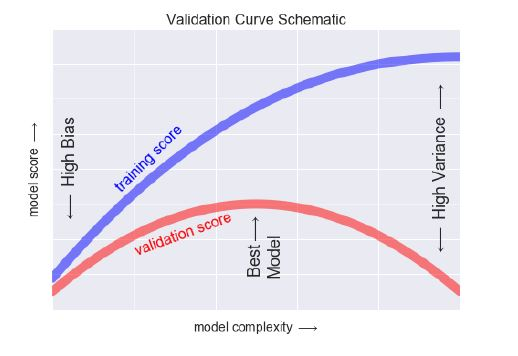